Optimization in 1-D and N-D. Debugging Functions
====

## Unit 11, Lecture 1

*Numerical Methods and Statistics*

----

#### Prof. Andrew White,  April 11, 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Numerical Optimization - Root Finding
====

What is $x$ in

$$\cos (x) = x$$

To use a root-finding method, we must make our equation have one side be 0.

$$\cos (x) - x = 0$$

Newton's Method - For finding Roots
====

In [2]:
from scipy.optimize import newton

root =  newton(lambda x: np.cos(x) - x, x0=0)
print(root, np.cos(root) - root)

0.739085133215 0.0


$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$$

Newton's Method
====

**Type:** Root Finding

**Discrete/Continuous:** Continuous

**Dimensions:** 1

**Derivative:** optional

**Convex:** yes

**Python:** `newton`

Let's try to solve a more interesting equation with Newton's method!

$$ \int_0^x e^{-s^2}\,ds = \frac{1}{2}$$

Find $x$

In [7]:
#Note: this code is intentially really bad
from scipy.integrate import quad
def equation(x):
    return quad(lambda s: np.exp(-s**2), 0, x)
root = newton(equation, x0=0)

TypeError: can't multiply sequence by non-int of type 'float'

Steps for Debugging Code
====

1. Correct any Python errors
2. Restart the Kernel
3. Correct any Python errors
4. Print to discover logical errors

Most Common Mistakes
----

1. Copy-Pasta leaving in old variables
2. Mixing Numpy arrays and `for` loops
3. Confusing integer and floating point arithmetic
4. Order of execution

Review of Functions
====

For functions like `quad`, `newton`, and `minimize` the function should take in 1 argument and return 1 argument.

Correct Examples
====

$$x^2 - 3x + 2$$

In [9]:
def version_1(x):
    return x**2 - 3 *x + 2

version_2 = lambda x: x ** 2 - 3 *x + 2

np_version = np.vectorize(version_1)

print(version_1(3.))
print(version_2(3.))

some_threes = np.zeros(10)
some_threes[:] = 3.0 # -> Notice how we don't replace the numpy array with 3, but instead make all elements in it equal to three
#some_threes = 3 -> This would delete the numpy array and now some_threes would be a single 3

print(np_version(some_threes))

2.0
2.0
[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


$$\int_{\pi}^x \sin^2(s)\,ds$$

In [10]:
from scipy.integrate import quad
import numpy as np
from math import pi

def integrate_sin2(x):
    ans, err = quad(lambda s: np.sin(s) ** 2, pi, x)
    return ans
    
print(integrate_sin2(2 * pi))

1.5707963267948966


2 Vectors, $\vec{x}$ and $\vec{y}$, where one component of $\vec{x}$ is changing and we want to know the distance between the two vectors.

In [11]:
from math import sqrt

def distance(x, y):
    sum_sq = np.sum((x - y)**2)
    return sqrt(sum_sq)

def my_distance(s):
    x = np.zeros(3)
    y = np.zeros(3)
    x[0] = 2.0
    x[1] = s
    x[2] = -3.5
    y[0] = 1.0
    y[1] = -3.0
    y[2] = 0.0
    return distance(x, y)

print(my_distance(1))

5.408326913195984


Incorrect Examples
----

### No Return Value

In [12]:
def version_1(x):
    x**2 - 3 *x + 2

print(version_1(3.))

None


### Bad Return Value

In [13]:
def integrate_sin2(x):
    return quad(lambda s: np.sin(s) ** 2, pi, x)

print(integrate_sin2(2 * pi))

(1.5707963267948966, 1.743934249004316e-14)


### Too many arguments

In [14]:
def distance(x, y):
    sum_sq = np.sum((x - y)**2)
    return sqrt(sum_sq)

print(distance(1))

TypeError: distance() missing 1 required positional argument: 'y'

Let's return to our example from above:

$$ \int_0^x e^{-s^2}\,ds = \frac{1}{2}$$

Find $s$

In [12]:
#note still wrong
def equation(x):
    ans, err = quad(lambda s: np.exp(-s**2), 0, x)
    return ans
root = newton(lambda x: equation(x), x0=0)
print(root)

-4.5175088239502025e-29


In [13]:
equation(root)

-4.5175088239502025e-29

In [14]:
root = newton(lambda x: equation(x) - 0.5, x0=0)
print(root, equation(root))

0.5510394276090266 0.49999999999999994


Scope
----

Scope means the set of variables and functions which are defined and accessible in your code

In [15]:
x = 4
y = 2

#Right now, there is x,y and all other functions/variables defined or imported above in the scope

Scopes nest
----

In [16]:
x = 4
y = 2
#Here, I have x and y in scope
def scope_example():
    z = 2
    #Here, I have x,y and z in scope
    
#Here I again have only x and y in scope

In [17]:
x = 4 
y = 2
print(y,"Before function")
def scope_example():
    y = 25 #This is a new version of y that exists only in this scope
    print(y, "Inside function")
scope_example()
print(y, "After Function")

2 Before function
25 Inside function
2 After Function


In [18]:
x = 4 
y = [2]
print(y,"Before function")
def scope_example():
    y[0] = 25 #Here I'm not creating a y, but modifying y
    print(y, "Inside function")
scope_example()
print(y, "After Function")

[2] Before function
[25] Inside function
[25] After Function


Things to remember about scope:

1. Scopes nest, so that you can access things above your scope
2. You can modify variables from any scope you can see, but ones you create disappear outside of the scope

Returning to Optimization
====

Applications of Optimization
===

1. Solving non-linear equations
2. Solving systems of equations
3. Optimizing equations with our without constraints
4. Fitting models to data

Choosing which method to use
----

There are four things to consider when doing optimization:

1. Is it 1 or N dimensions?
2. Are you minimizing or root-finding?
3. Are there constraints?
4. Are there bounds?
5. Is it convex or non-convex?

Identifying Convexity
====

If a problem has more than one minimum (derivative is 0), then the problem is non-convex. **The opposite of convex is non-convex. A concave function can be made convex with a negative sign. A non-convex function cannot be made convex**.

Knowing about convexity can come from:

* Plots
* Running convex optimization in two starting positions and getting different minimums
* Knowing something specific about the problem

Consider a function with two minimums:

In [19]:
def two_well(x):
    if x < 0.125:
        return (x + 2) ** 2
    if x >= 0.125:
        return (x - 2) ** 2 + 1
def two_well_d(x):
    if x < 0.125:
        return 2*(x + 2)
    if x >= 0.125:
        return 2 * (x - 2)
    
np_two_well = np.frompyfunc(two_well, 1, 1)
np_two_well_d = np.frompyfunc(two_well_d, 1, 1)

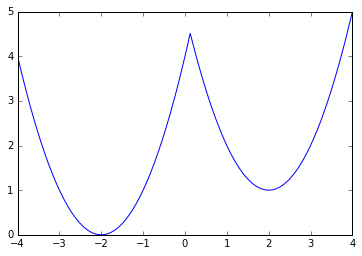

In [20]:
x = np.linspace(-4, 4, 1000)
plt.plot(x, np_two_well(x))
plt.show()

In [21]:
newton(func=np_two_well, x0=0, fprime=np_two_well_d)

-1.9999999925494194

In [22]:
newton(func=np_two_well, x0=1, fprime=np_two_well_d)

/opt/conda/lib/python3.5/site-packages/scipy/optimize/zeros.py:142: RuntimeWarning: derivative was zero.
  warnings.warn(msg, RuntimeWarning)


2.0

BFGS Optimization - Minimization
====
Broyden–Fletcher–Goldfarb–Shanno

BFGS
====

**Type:** Minimization

**Discrete/Continuous:** Continuous

**Dimensions:** N

**Derivative:** optional

**Convex:** yes

**Python:** `minimize` if no constraints or bounds are given

Nomenclature
----

In optimization, you have a function called the **objective function**. That's what you're minimizing. It always returns a single value. It is sometimes called the **fit**, the **error**, the **residual**, or the **penalty**.

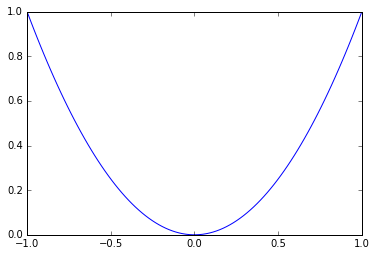

In [23]:
def obj(x):
    return x**2

x = np.linspace(-1,1,100)
plt.plot(x, obj(x))
plt.show()

In [24]:
from scipy.optimize import minimize

minimize(obj, x0=3)

      fun: 5.552225540264749e-17
 hess_inv: array([[ 0.5]])
      jac: array([ -1.49030213e-12])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([ -7.45132575e-09])

Minimize Return value
----
         fun: The value of the function at the minimum
    hess_inv: The inverse of the the Hessian
         jac: The value of the Jacobian
     message: A string describing what happened
        nfev: Number of function evaluations
         nit: Number of iterations of the x point
        njev: Number of times it computed the Jacobian
      status: The single digit message (0 = success, != 0 some error)
     success: Boolean indicating success
           x: The minimum x

Objective Functions
===

Using square error objective functions, you can achieve amazing things

Solve an equation with square error
====

$$ x^4 -x^3 + 2 x^2 - 3x = 5$$

In [25]:
def obj_fxn(x):
    fx = x ** 4 - x ** 3 +  2 * x**2 - 3 * x
    return (fx - 5) ** 2
result = minimize(obj_fxn, x0=1)
print (result)
print ('The answer is {}, which gives f(x) = {}'.format(result.x, obj_fxn(result.x)))

      fun: 1.4106600055951937e-14
 hess_inv: array([[ 0.00184901]])
      jac: array([  1.23685257e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 4
     njev: 12
   status: 0
  success: True
        x: array([ 1.75645154])
The answer is [ 1.75645154], which gives f(x) = [  1.41066001e-14]


Solve multiple equations with square error
====

$$ m = 4 $$
$$ 2m = 8.5 $$
$$ 3m = 11.2$$

In [26]:
def obj_fxn(m):
    p1 = (m - 4)**2
    p2 = (2 * m - 8.5)**2
    p3 = (3 * m - 11.2)**2
    return p1 + p2 + p3
result = minimize(obj_fxn, x0=4)
print(result.x)


[ 3.89999999]


Solving Multiple Equations
===

We've always had 1 dimensional outputs. For minimization, if we want to work with minimizing multiple quantities, we can just add them. What about solving multiple equations?

Solve this system of equations:

$$ 3 x + 2y = 4$$
$$ 2 x^2 - y = 2$$

In [27]:
from scipy.optimize import root

def function(x):
    ans = np.zeros(2)
    ans[0] = 3 * x[0] + 2 * x[1] - 4
    ans[1] = 2 * x[0] ** 2 - x[1] - 2
    return ans
x = root(function, x0=[0,0]) # <- notice how our function gives back multiple equations

print(x)
print('The answer: ', x.x)

    fjac: array([[-0.78337449, -0.62155   ],
       [ 0.62155   , -0.78337449]])
     fun: array([  0.00000000e+00,   4.44089210e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([ -5.07911117e-12,  -6.40149002e-12])
       r: array([-3.82958602, -0.12803865,  3.05638771])
  status: 1
 success: True
       x: array([ 1.08808749,  0.36786877])
The answer:  [ 1.08808749  0.36786877]


Powell hybrid method
====

**Type:** Root finding

**Discrete/Continuous:** Continuous

**Dimensions:** N

**Derivative:** optional

**Convex:** yes

**Python:** `root` unless `method` argument specifies a different method

Identifying Convexity for Minimization - Example
----

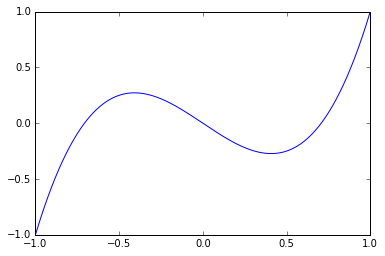

In [28]:
x = np.linspace(-1, 1, 1000)
plt.plot(x,  2 * x ** 3 - 0 * x **2  - x)
plt.show()

In [29]:
from scipy.optimize import minimize
minimize(lambda x:  2 * x ** 3 - 0 * x **2  - x, x0=0.05)

      fun: -0.27216552697590846
 hess_inv: array([[ 0.20398928]])
      jac: array([ -1.11758709e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([ 0.40824828])

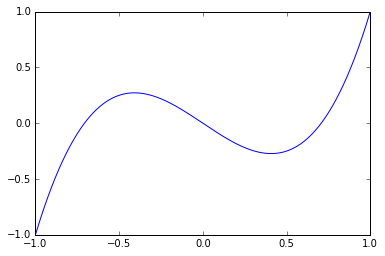

In [30]:
x = np.linspace(-1, 1, 1000)
plt.plot(x,  2 * x ** 3 - 0 * x **2  - x)
plt.show()

In [31]:
from scipy.optimize import minimize
minimize(lambda x:  2 * x ** 3 - 0 * x **2  - x, x0=-0.5)

      fun: array([ -2.69222072e+08])
 hess_inv: array([[-0.00032489]])
      jac: array([ 1575936.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 60
      nit: 1
     njev: 16
   status: 2
  success: False
        x: array([-512.49995422])